# Funktionen

* [Gültigkeit von Variablen](#G%C3%BCltigkeit-von-Variablen)
* [Aufbau von Funktionen](#Aufbau-von-Funktionen)
* [Mutable und immutable in Funktionen](#Mutable-und-immutable-in-Funktionen)
* [Iteratoren](#Iteratoren)
* [Generatoren](#Generatoren)
* [Programmierregeln](#Programmierregeln)
* [Rekursive Funktionen](#Rekursive-Funktionen)
* [Sage mit externen Editoren](Sage-mit-externen-Editoren)



### G&uuml;ltigkeit von Variablen
Mit der G&uuml;ltigkeit von Variablen ist die Bestandsdauer von Variablen bzw. der Werten dieser Variablen gemeint.  
<ul>
<li><strong>globale Variablen</strong>: Im aktuellen notebook sind alle Variablen/Funktionen global, d.h. die den Variablen zugewiesenen Werte bleiben f&uuml;r die gesamte Laufzeit vom jeweiligen notebook erhalten bis sie ge&auml;ndert werden. Man kann auf die Variablen jederzeit zugreifen und die Werte der Variablen &auml;ndern.</li>
<li><strong>lokale Variablen</strong>: Diese sind nur innerhalb einer Prozedur/Funktion g&uuml;ltig. Nach Beenden der Funktion werden diese Variablen wieder gel&ouml;scht.</li>
</ul>

In [1]:
reset()
def f(k): return k^2*a

In [1]:
k

NameError: name 'k' is not defined

In [1]:
f(2)

NameError: global name 'a' is not defined

<strong>Vorsicht:</strong> Leider sind in Sage alle definierten Variablen dann auch <em>innerhalb</em> der Funktion bekannt, wie es mit <strong>global</strong> erreicht werden k&ouml;nnte. Bitte nutzt dies nicht aus, da es der &Uuml;bersichtlichkeit schadet! Wenn dann explizit <strong>global</strong> nutzen!  

In [1]:
a=5
f(2)

20

<strong>Achtung:</strong> Die Verwendung von globalen Variablen in Prozeduren sollte im allgemeinen vermieden (da unübersichtlich)! 
Wenn dann sollte man explizit globale Variablen erzeugen mittels <em>global</em>:  

In [1]:
reset()
global a
a=2
def f(k): global a; return k^2*a
f(2)

8

So ist es richtig :)  

In [1]:
reset()
def f(k,a): return k^2*a

In [1]:
f(2,a=7)

28

In [1]:
f(2,7)

28

<em>Wiederholung Hinweis</em>: benutzt f&uuml;r jede neue Aufgabe ein reset() und schreibe Funktionen so, dass sie alle n&ouml;tigen Variablen als Argumente &uuml;bergeben bekommen.  

## Aufbau von Funktionen

``` python
def <Name><(<argument1>, ..., <argumentN>=<defaultwert>): 
    <Code-Block> 
    return <ret>
```
<ul>
<li>Argumente/&Uuml;bergabeparameter (a,b,..) und eventuelle Defaultwerte (a=5, b=3, ..)</li>
<li>In der Funktion sind nur die Argumente und neu erzeugte Variablen verf&uuml;gbar.</li>
<li>Jede Zeile, die einen folgenden Block einleitet, muss mit einem Doppelpunkt : abgeschlossen werden.</li>
<li>Jede Zeile in diesem Block muss eine gr&ouml;ssere Einr&uuml;ckung besitzen (typischerweise ein <em>Tab</em>)</li>
<li>Zeilen gleicher Einr&uuml;ckung geh&ouml;ren zum gleichen Block.</li>
<li>R&uuml;ckgabewert <em>ret</em> mittels ```return(ret)``` zur&uuml;ckgeben. Funktion ist dann beendet.</li>
<li>Ohne return wird eine leere Variable des Typs <em>NoneType</em> zur&uuml;ckgegeben.</li>
</ul>
Erkl&auml;rungen/Kommentare  
<ul>
<li>In <em>""" comment """</em> eingeschlossene Zeilen werden als Hilfetext abgespeichert und k&ouml;nnen durch <em>  	&lt;funktionsname&gt;?</em> abgefragt werden.</li>
<li>Kommentarzeilen: Diese beginnen mit #. Sie werden vom System ignoriert.</li>
</ul>
Beispiel: Maximum zweier Zahlen $a$ und $b$.  
<ul>
<li>Aufruf in Sage ist <em>MyMax(a,b).</em></li>
<li>Die Funktion gibt dann entweder den Wert $a$ oder den Wert $b$ zur&uuml;ck.</li>
</ul>

In [1]:
def MyMax(a,b):
    """Maximum von a und b."""
    if a<b:
        return (b)
    else: 
        return (a)

Hilfetext  

In [1]:
MyMax?

In [1]:
MyMax(7,4)

7

Funktion mit Default-Wert für a (Wiederholung *benannte argumente*)  

In [1]:
reset()
def f(k,a=5,b=6): 
    return k^2*a*b

In [1]:
f(2), f(2,2,4), f(2, b=3,  a=2)

(120, 32, 24)

### <em>Mutable</em> und <em>immutable</em> in Funktionen


In [1]:
reset()
def f(k): k.append(3)

In [1]:
a = [1,2] ; print(f(a)) ;a

None


[1, 2, 3]

Jetzt ist a global ge&auml;ndert. Manche Funktionen wollen und machen genau das, andere nicht. Es ist wichtig zu wissen, was der Fall ist und auch was man bei eigenen Funktionen haben m&ouml;chte.  
Wir schreiben die Funktion entsprechend um:  

In [1]:
reset()
def f(k): 
    ret = copy(k)
    ret.append(3)
    return ret

In [1]:
a = [1,2] ; b = f(a) ; a,b

([1, 2], [1, 2, 3])

Hier haben wir explizit die Variable (hier die Liste) <strong>kopiert</strong> und konnte dann mit einem neuen Objekt (ret) weiterarbeiten, welches das urspr&uuml;ngliche nicht mehr &auml;ndert.  

Also:  

``` python
copy(<objekt>)
```

kopiert das Objekt/Variable ```<objekt>```  

## Iteratoren
Iteratoren sind Objekte, die <em>iterierbar</em> sind: d.h. sie besitzen eine Objekt-Methode 
``` python
next()
```
die ein n&auml;chstes Element zur&uuml;ckgibt. Und sie beenden sich, wenn keine Elemente mehr vorhanden sind.  


``` python 
iter()
``` 
versucht aus einem Objekt ein Iterator zu machen (Das passiert tats&auml;chlich bei einer for-Schleife)  

In [1]:
Liste = [1,2,3]
iterator = iter(Liste); iterator

In [1]:
iterator.next()

1

In [1]:
iterator.next()

2

In [1]:
iterator.next()

3

In [1]:
iterator.next()

StopIteration: 

Allgemein gilt daher: die for-Schleife erwartet entweder einen Iterator oder ein Objekt, was durch ```iter()``` zu einem Iterator gemacht werden kann. 

Die folgenden beiden Schleifen sind &auml;quivalent.  

In [1]:
Liste = [1,2,3]
for i in iter(Liste):
    print i

1
2
3


In [1]:
for i in Liste:
    print i

1
2
3


*List comprehensions* sind Iteratoren, wenn sie mit runden Klammern aufgerufen werden. Die Standard-Schreibweise mit eckigen Klammern erzeugt direkt eine Liste.  

In [1]:
it = (i for i in [1..3])

In [1]:
print(type(it))
it.next()

<type 'generator'>


2

## Generatoren
Eine spezielle Klasse von Funktionen, die Iteratoren erzeugen. Die Funktion endet nicht bei einem return und kann sp&auml;ter wieder aufgerufen werden, um weitere Befehle durchzuf&uuml;hren. Dies wird in der Praxis durch den Befehl 
``` python
yield <returnwert>
``` 
erreicht.

Erinnerung Fxpunkt:

In [1]:
reset()
def fixpunkt(f,In,x0,maxn):
    y = [x0]
    p = plot([f,x],(In[0],In[1]) ) # function and x
    i = 0
    while i<maxn:
        y.append(f(y[i]))
        p += line( [ (y[i],y[i]), (y[i],y[i+1]), (y[i],y[i+1]), (y[i+1],y[i+1]) ],linestyle='--', color='red')
        p.show()        
        i += 1
        yield y[-1]

In [1]:
fixpgen = fixpunkt(lambda x: cos(x),[0.0,1],0.2,4); fixpgen

<generator object fixpunkt at 0x7fcb7de858c0>

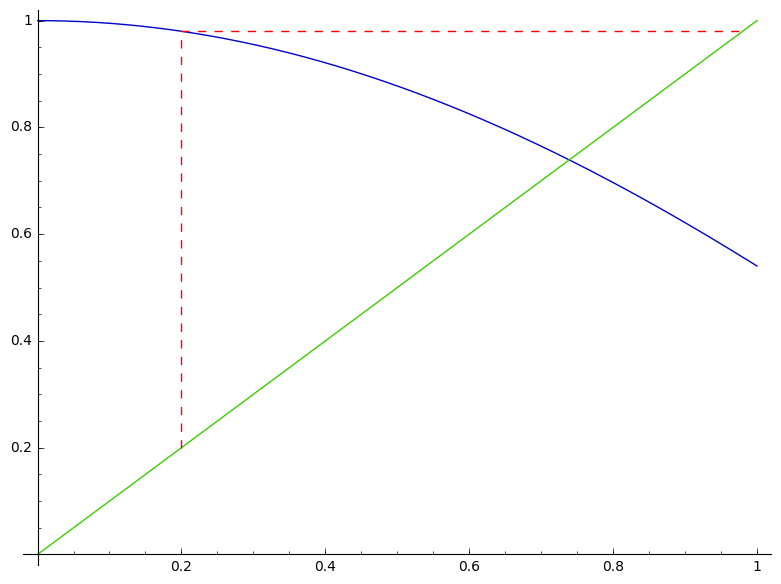

0.980066577841242

In [1]:
fixpgen.next()

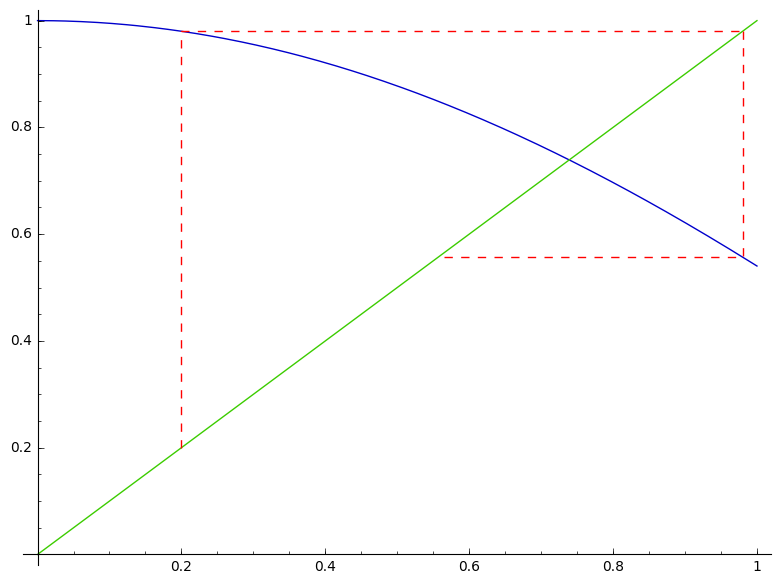

0.556967252809642

In [1]:
fixpgen.next()

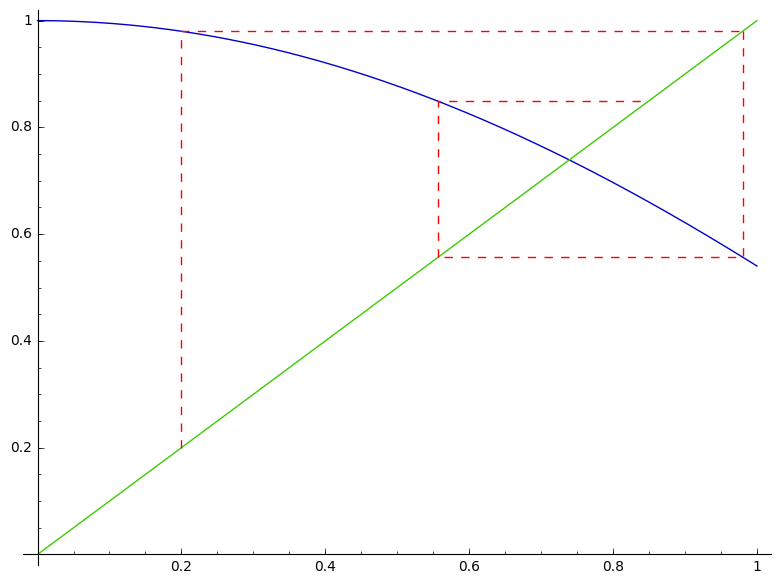

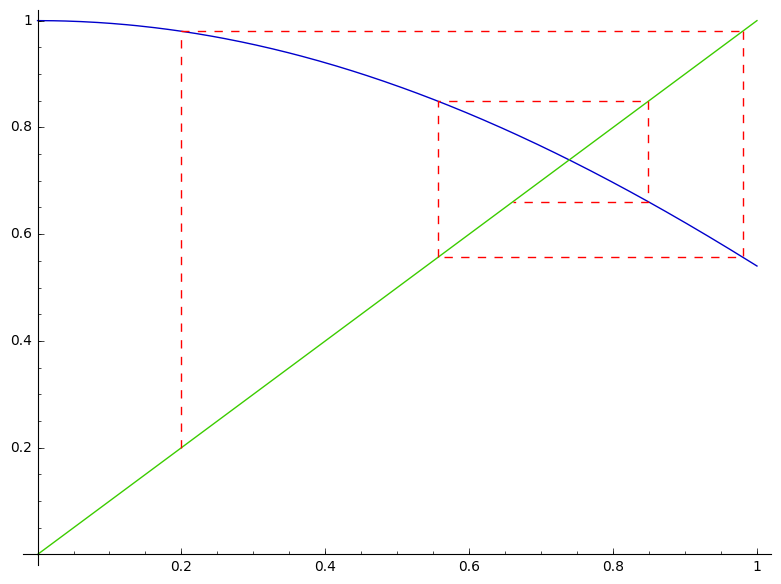

In [1]:
for i in fixpgen:
    pass

## Programmierregeln
Prinzipien des Programmierens:  
<ul>
<li><em>(Wieder-)Verwendbarkeit </em> $\Rightarrow$ Dokumentation,</li>
<li><em>Wartungsfreundlichkeit </em>$\Rightarrow$ gute Code-Lesbarkeit, Kommentieren</li>
<li><em>Korrektheit und Erweiterbarkeit </em> $\Rightarrow$ Tests pr&uuml;fen, ob vor und nach der &Auml;nderung alles korrekt ist</li>
</ul>
  
<ul>
<li><em>Hilfetext</em>: Ein Programm sollte im Hilfetext eine gute Beschreibung der Funktionsweise der Funktion enthalten. Dieser sollte insbesondere Ein- und Ausgabe-Variablen genau beschreiben.</li>
<li><em>Kommentieren</em>: Im Programm sollte durch Kommentare dokumentiert werden, was einzelne, wesentliche Abschnitte/Zeilen im Programm tun.</li>
<li><em>Passende Benennung von Variablen/Funktionen</em>: Variablen und Funktionen sollten durchdacht benannt werden, d.h. man sollte an ihnen im Optimum direkt erkennen k&ouml;nnen, welchem Zweck sie im gegebenen Kontext dienen.</li>
<li><em>(Automatische Tests)</em>: Diese sorgen daf&uuml;r, dass man nach &Auml;nderungen leicht Fehler erkennt.</li>
</ul>
Diese Regeln sind nicht vollst&auml;ndig! (Siehe z.B. <em>"Fundamental principles of software engineering - a journey"</em> , Pierre Bourque et al.)  

In [1]:
def Maximum(zahl1,zahl2):
    """Berechnet das Maximum von zahl1 und zahl2 und gibt es zurueck.
    
    INPUT:

    - ``zahl1` -- real () erste zu ueberpruefende Zahl
    - ``zahl2`` -- real () zweite zu ueberpruefende Zahl
    
    OUTPUT:

    - die groessere von beiden Zahlen
        
    EXAMPLES:

    ::
    
        sage: print(Maximum(5,8))
        8
        
    """
    #Prüfen ob zahl1 kleiner als zahl2 ist
    if zahl1<zahl2: 
        #zahl2 ist grösser als zahl1, gebe diese zurück
        return (zahl2)
    else: 
        #zahl1 ist grösser als zahl2, gebe diese zurück
        return (zahl1)

In [1]:
Maximum?

In [1]:
Maximum(5,8)

8

## Rekursive Funktionen
Rekursive Funktionen sind Funktionen, die sich selbst aufrufen. Bei jedem Aufruf wird ein neuer lokaler Variablen-Raum erzeugt.  
Berechnung des ggT von nat&uuml;rlichen Zahlen $a$ und $b$ mit Hilfe des euklidischen Algorithmus:<br /><br /><em>Idee:</em> Es gilt $ggT(a,b)=ggT(a,b-a)$ f&uuml;r $a<b$.<br /><br />Algorithmus:<br />Wiederhole, bis $a=b$  
<ul>
<li>Ist $a>b$, so $a=a-b$.</li>
<li>Ist $a<b$, so $b=b-a$</li>
</ul>

In [1]:
def ggt_rekursiv (a,b,depth=0):
    """ggt_rekursiv berechnet den groessten gemeinsamen Teiler (ggT) """
    print (depth*"  "  + "call : {}, {}".format(a,b))
    if a <> b:
        if a>b:
            a = a-b
        else:
            b = b-a
        return ggt_rekursiv(a,b,depth+1)
    print (depth*"  "  + "end: {}".format(a))
    return a

In [1]:
ggt_rekursiv(12,9)

call : 12, 9
  call : 3, 9
    call : 3, 6
      call : 3, 3
      end: 3


3

In [1]:
def ggt_rekursiv (a,b):
    """ggt_rekursiv berechnet den groessten gemeinsamen Teiler (ggT) """
    if a <> b:
        if a>b:
            a = a-b
        else:
            b = b-a
        return ggt_rekursiv(a,b)   
    return a

def ggT(a,b):  
    """Bestimme den ggT von a und b"""
    while a<>b:
        if a>b:
            a = a-b
        else: 
            b = b-a
    return a
ggT(12,9)

3

<strong>Vorsicht:</strong> Rekursive Funktionen sind i.A. deutlich langsamer und verbrauchen viele Ressourcen. Wenn es geht, sollten iterative L&ouml;sungen bevorzugt werden. Teilweise sind rekursive L&ouml;sungen aber sowohl einfach wie elegant. Es ist also eine Abw&auml;gung n&ouml;tig.  

In [1]:
timeit('ggT(92132121,123123)')

625 loops, best of 3: 166 µs per loop


In [1]:
timeit('ggt_rekursiv(92132121,123123)')

625 loops, best of 3: 720 µs per loop


<h3>Sage mit externen Editoren</h3>
Bei umfangreicheren Funktionen oder richtigen Programmen ist es evtl. sinnvoller, dies mit einem Editor zu erstellen.  
Erstellen einer 
```
<name>.sage
<name>.py
```

Datei (Editor: z.B. atom, vim, emacs),  welche dann mittels

``` python
load(<dateiname>)
```

eingelesen und ausgeführt werden kann.


In [1]:
reset()
load("/home/jschulz1/sage/test.py")

In [1]:
a

5

In [1]:
b

6